In [1]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from flashtorch.utils import load_image
from flashtorch.utils import apply_transforms, denormalize, format_for_plotting
from flashtorch.saliency import Backprop
import matplotlib.pyplot as plt

In [29]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.head = models.resnet50(pretrained=True)
        # Remove classification layers so that we are able to add our own CNN layers
        self.head.fc = nn.Sequential(
                                nn.Linear(2048, 1024, bias=True),
                                nn.BatchNorm1d(1024),
                                nn.ReLU(),
                                nn.Dropout(0.25))
        self.fc1 = nn.Sequential(
                                nn.Linear(1024, 512, bias=True),
                                nn.BatchNorm1d(512),
                                nn.ReLU(),
                                nn.Dropout(0.50),
                                nn.Linear(512, 5, bias=True),
                                nn.ReLU()
        )
        
    def forward(self, image):
        image = self.head(image)
        return self.fc1(image)

In [30]:
os.listdir('.')

['accuracy_plot.png',
 '.DS_Store',
 'model3-41.pth',
 'images',
 'hi.png',
 'f1_plot.png',
 'Saliency Maps.ipynb',
 'loss_plot.png',
 '.ipynb_checkpoints',
 'Visualizations.ipynb']

In [31]:
device = torch.device('cpu')
resnet = ResNet()
resnet.load_state_dict(torch.load('model3-41.pth', map_location=device))

<All keys matched successfully>

In [37]:
image1 = load_image('images/napkin.jpg')
image2 = load_image('images/paper1.jpg')
image3 = load_image('images/paper3.jpg')
image4 = load_image('images/tissue1.jpg')
image5 = load_image('images/tissue2.jpg')

In [33]:
im_transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
])

In [38]:
input1 = apply_transforms(image1)
input2 = apply_transforms(image2)
input3 = apply_transforms(image3)
input4 = apply_transforms(image4)
input5 = apply_transforms(image5)

In [39]:
backprop = Backprop(resnet)

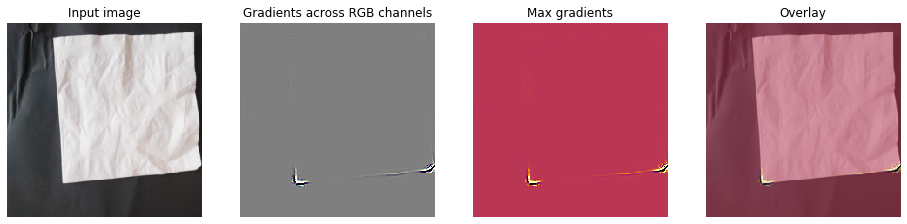

In [54]:
backprop.visualize(input1, 1, guided=True, cmap='inferno')

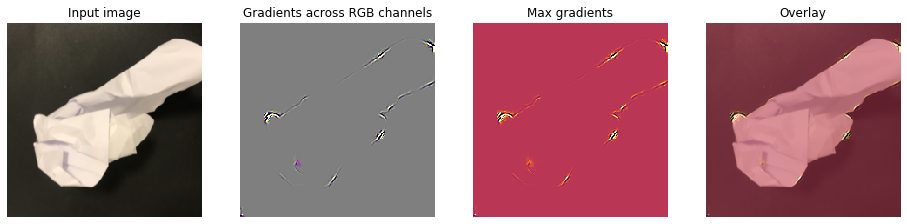

In [56]:
backprop.visualize(input3, 2, guided=True, cmap='inferno')

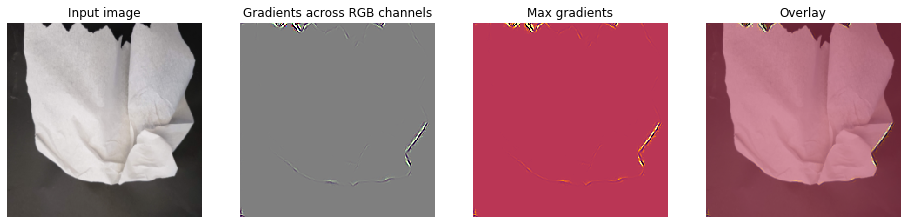

In [57]:
backprop.visualize(input4, 1, guided=True, cmap='inferno')

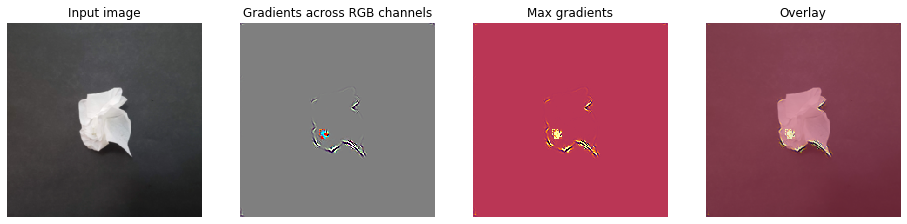

In [58]:
backprop.visualize(input5, 1, guided=True, cmap='inferno')